# Notebook Examples for Chapter 2
# Image Statistics
In an optical/infrared or a synthetic aperture radar image, a given pixel value $g(i,j)$, derived from the measured radiation field at a satellite sensor, is never exactly reproducible. It is the outcome of a complex measurement influenced by instrument noise, atmospheric conditions, changing illumination and so forth. It may be assumed, however, that there is an underlying random mechanism with an associated probability distribution which restricts the possible outcomes in some way. Each time we make an observation, we are sampling from that probability distribution or, put another way, we are observing a different possible _realization_ of the random mechanism. In Chapter 2, some basic statistical concepts for multi-spectral and SAR images viewed as random mechanisms are introduced.

In [1]:
# Requirements

from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np
import IPython.display as disp
import scipy.stats as st
from scipy.stats import norm, chi2
import auxil.auxil1 as auxil  
import torch

%matplotlib inline

import ee
#ee.Authenticate()
ee.Initialize()

## 2.1 Random variables

### 2.1.1 Discrete random variables
### 2.1.2 Continuous random variables
### 2.1.3 Random vectors

### 2.1.4 The normal distribution

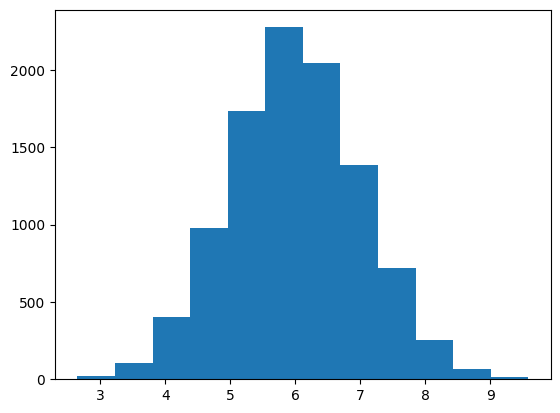

In [3]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random.rand(10000,12)
array = np.sum(r,1)
p = plt.hist(array,bins=12)

#plt.savefig('/home/mort/LaTeX/new projects/CRC5/Chapter2/fig2_1.eps')

### 2.1.5 The gamma distribution and its derivatives

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


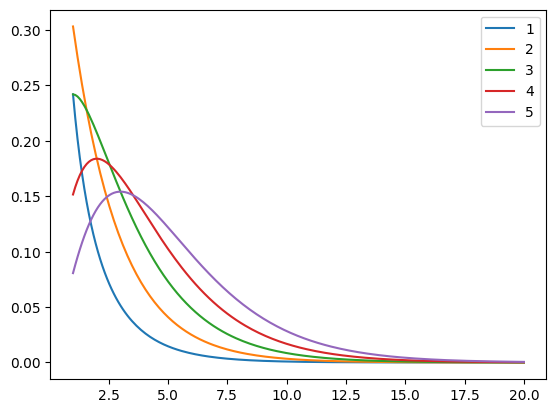

In [4]:
import scipy.stats as st

z = np.linspace(1,20,200)
ax = plt.subplot(111)
for i in range(1,6):
    ax.plot(z,st.chi2.pdf(z,i),label = str(i))
ax.legend()    

#plt.savefig('/home/mort/LaTeX/new projects/CRC5/Chapter2/fig2_2.eps')

## 2.2 Parameter estimation

### 2.2.1 Random samples

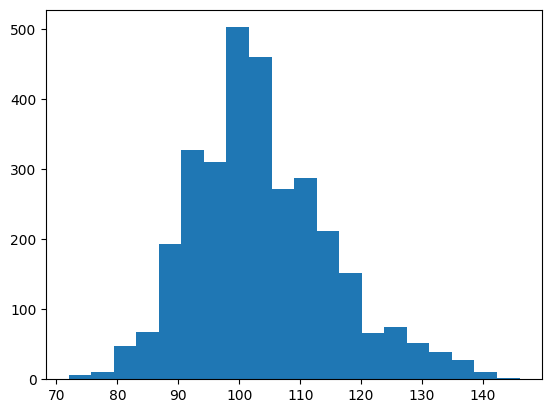

In [5]:
import ee
ee.Initialize()

im = ee.Image(ee.ImageCollection('ASTER/AST_L1T_003') \
            .filterBounds(ee.Geometry.Point([6.5,50.9])) \
            .filterDate('2007-04-30','2007-05-02') \
            .first()) \
            .select('B3N')
roi = ee.Geometry.Polygon(
    [[6.382713317871094,50.90736285477543],
     [6.3961029052734375,50.90130070888041],
     [6.4015960693359375,50.90519789328594],
     [6.388206481933594,50.91169247570916],
     [6.382713317871094,50.90736285477543]])
sample = im.sample(roi,scale=15) \
           .aggregate_array('B3N').getInfo()
p = plt.hist(sample,bins=20)

#plt.savefig('/home/mort/LaTeX/new projects/CRC5/Chapter2/fig2_4.eps')

### 2.2.2 Sample distributions and interval estimators

In [10]:
from scipy.stats import norm,chi2

def x2(a,m):
    return chi2.ppf(1-a,m)

m = 1000
a = 0.05
g = np.random.random(m)
gbar = np.sum(g)/m
s = np.sum((g-gbar)**2)/(m-1)
print('sample variance: %f'%s)
lower = (m-1)*s/x2(a/2,m-1)
upper = (m-1)*s/x2(1-a/2,m-1)
print('%i percent confidence interval: (%f, %f)'\
               %(int((1-a)*100),lower,upper))
print('sample mean: %f'%gbar)
t = norm.ppf(1-a/2)
sigma = np.sqrt(s)
lower = gbar-t*sigma/np.sqrt(m)
upper = gbar+t*sigma/np.sqrt(m)
print('%i percent confidence interval: (%f, %f)'\
               %(int((1-a)*100),lower,upper))

sample variance: 0.083709
95 percent confidence interval: (0.076827, 0.091563)
sample mean: 0.502814
95 percent confidence interval: (0.484881, 0.520746)


## 2.3 Multivariate distributions
### 2.3.1 Vector sample functions and the data matrix

### 2.3.2 Provisional means

In [6]:
gdal.AllRegister()
infile = 'imagery/AST_20070501.tif'                
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize
Xs = np.zeros((cols,3))
cpm = auxil.Cpm(3)
rasterBands=[inDataset.GetRasterBand(k+1)
             for k in range(3)]
for row in range(rows):
    for k in range(3):
        Xs[:,k]=rasterBands[k].ReadAsArray(0,row,cols,1)
    cpm.update(Xs)   
print(cpm.covariance())

[[ 407.13229638  442.18038333  -78.32374081]
 [ 442.18038333  493.57036037 -120.6419761 ]
 [ -78.32374081 -120.6419761   438.95704379]]


### 2.3.3 Real and complex multivariate sample distributions

## 2.4 Bayes' Theorem, likelihood and classification
## 2.5 Hypothesis testing

## 2.6 Ordinary linear regression
### 2.6.1 One independent variable
### 2.6.2 Coefficient of determination $(R^2)$


### 2.6.3 More than one independent variable

In [7]:
import numpy as np
# biased data matrix X ( 3 independent variables)
X = np.random.rand(100,3)
X = np.mat(np.append(np.ones((100,1)),X,axis=1))
# a parameter vector
w = np.mat([[3.0],[4.0],[5.0],[6.0]])
# noisy dependent variable y with sigma = 0.1
y = X*w +  np.random.normal(0,0.1,(100,1))
# pseudoinverse
Xp = (X.T*X).I*X.T
# estimated parameter vector
w = Xp*y
w

matrix([[2.95784315],
        [3.99388797],
        [5.01632599],
        [6.06800581]])

In [8]:
import tensorflow as tf
X1 = tf.constant(X)
y1 = tf.constant(y)
X1T = tf.transpose(X1)
X1p = tf.linalg.matmul(tf.linalg.inv(
    tf.linalg.matmul(tf.transpose(X1), X1)), 
    tf.transpose(X1))
w = tf.linalg.matmul(X1p,y1) 
print(w)

2024-08-17 12:02:40.697226: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-17 12:02:40.699398: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-17 12:02:40.786820: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-17 12:02:41.117902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-17 12:02:41.913851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

tf.Tensor(
[[2.95784315]
 [3.99388797]
 [5.01632599]
 [6.06800581]], shape=(4, 1), dtype=float64)


In [9]:
ee.Initialize()
# set up JSON description of the calculatiom
X1 = ee.Array(X.tolist())
y1 = ee.Array(y.tolist())
X1T = X1.matrixTranspose()
X1p = X1T.matrixMultiply(X1) \
         .matrixInverse() \
         .matrixMultiply(X1T)
w = X1p.matrixMultiply(y1)
# run on GEE server
np.round(w.getInfo(),4)

array([[2.9578],
       [3.9939],
       [5.0163],
       [6.068 ]])

In [10]:
np.round(0.01*(X.T*X).I,6)

array([[ 1.244e-03, -8.970e-04, -6.910e-04, -8.040e-04],
       [-8.970e-04,  1.491e-03,  9.400e-05,  1.990e-04],
       [-6.910e-04,  9.400e-05,  1.257e-03,  1.590e-04],
       [-8.040e-04,  1.990e-04,  1.590e-04,  1.357e-03]])

### 2.6.4 Regularization, duality and the Gram matrix

## 2.7 Entropy and information
### 2.7.1 Kullback-Leibler divergence

### 2.7.2 Mutual information

In [12]:
def mi(arr1,arr2): 
    '''mutual information of two uint8 arrays '''
    p12 = np.histogram2d(arr1,arr2,bins=256,
                         density=True)[0].ravel()
    p1  = np.histogram(arr1,bins=256,density=True)[0]
    p2  = np.histogram(arr2,bins=256,density=True)[0] 
    p1p2 = np.outer(p1,p2).ravel()    
    idx = p12>0
    return np.sum(p12[idx]*np.log(p12[idx]/p1p2[idx]))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 
gdal.AllRegister() 
infile = 'imagery/AST_20070501.tif'
           
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize 
image = np.zeros((3,rows*cols)) 
# VNIR bands                                  
for b in range(3):
    band = inDataset.GetRasterBand(b+1)
    image[b,:]=np.byte(band.ReadAsArray(0,0,cols,rows))\
                                              .ravel()

print(mi(image[0,:],image[1,:]))
print(mi(image[0,:],image[2,:]))
print(mi(image[1,:],image[2,:]))


1.8153997594804863
0.5070492233442873
0.6361133989119447
